In [1]:
# The standard start of our notebooks
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris

#  Clustering

## Data

In [2]:
# Load the data, which is included in sklearn.
iris = load_iris()
X = pd.DataFrame(iris.data, columns=iris.feature_names)
y = pd.Series(iris.target).replace(to_replace=dict(enumerate(iris.target_names)))

## KMeans

Use KMeans to segment the iris data into two clusters

In [4]:
from sklearn.cluster import KMeans

km = KMeans(n_clusters=2)
km.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=2, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

Cluster centers

In [5]:
km.cluster_centers_

array([[ 5.00566038,  3.36037736,  1.56226415,  0.28867925],
       [ 6.30103093,  2.88659794,  4.95876289,  1.69587629]])

Cluster labels

In [6]:
labels = km.predict(X)
labels

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int32)

Distance from each point to each cluster center

In [8]:
dists = km.transform(X)
dists

array([[ 0.25017616,  4.08915352],
       [ 0.41860437,  4.10830705],
       [ 0.44248803,  4.27617968],
       [ 0.49406229,  4.14001609],
       [ 0.30272878,  4.13570588],
       [ 0.69141869,  3.76000949],
       [ 0.43884862,  4.21548951],
       [ 0.11551115,  4.01957084],
       [ 0.78292111,  4.30308463],
       [ 0.34414701,  4.06426991],
       [ 0.53159017,  3.95906128],
       [ 0.23055183,  4.00444872],
       [ 0.48383628,  4.18061817],
       [ 0.93654493,  4.63183084],
       [ 1.08590602,  4.22571183],
       [ 1.25665902,  4.03657776],
       [ 0.7265474 ,  4.11153033],
       [ 0.23420559,  4.0536405 ],
       [ 0.83335161,  3.70992556],
       [ 0.45406279,  4.0234674 ],
       [ 0.42884597,  3.73264247],
       [ 0.37485015,  3.9681777 ],
       [ 0.73890753,  4.61648115],
       [ 0.27599459,  3.69635391],
       [ 0.40718013,  3.75637482],
       [ 0.37308428,  3.90185539],
       [ 0.12417044,  3.86223337],
       [ 0.26268461,  3.97356487],
       [ 0.27116693,

Plot each of the 2D projections to see if the clustering "makes sense"

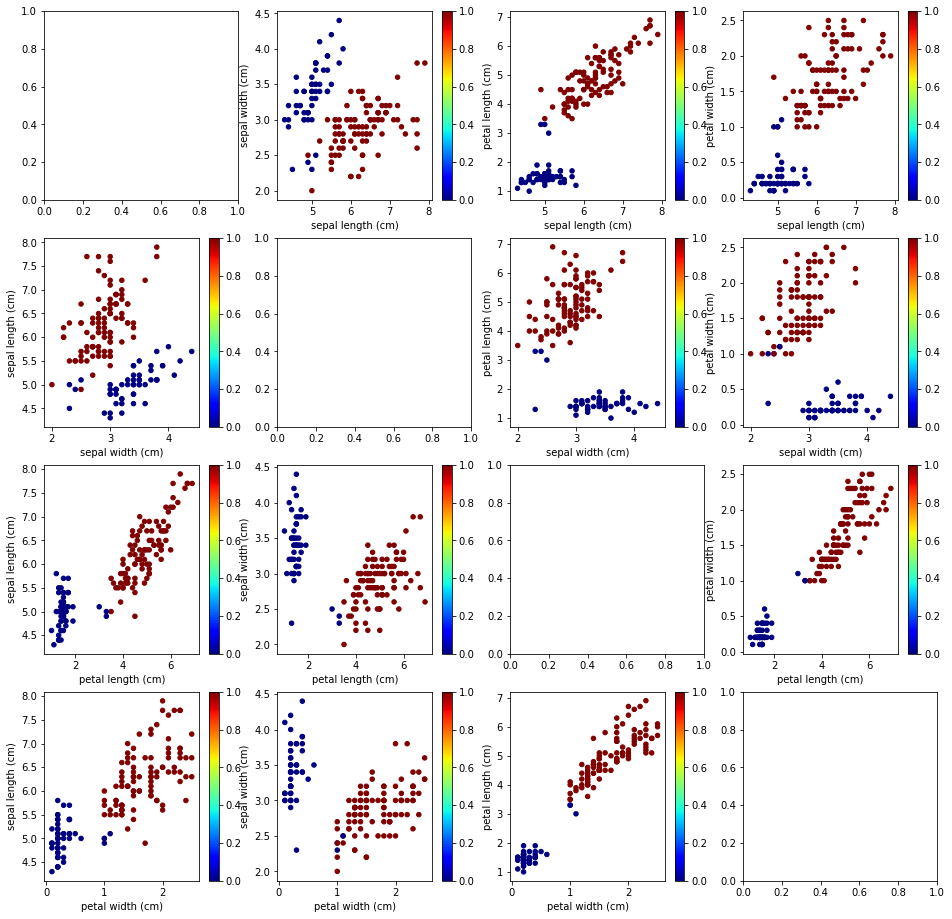

In [9]:
import matplotlib.cm as cm

fig, axes = plt.subplots(nrows=X.shape[1], ncols=X.shape[1], sharex=False, sharey=False, figsize = (16, 16))

cmap = cm.jet
for i, f1 in enumerate(X.columns):
    for j, f2 in enumerate(X.columns):
       if not f1 == f2:
        X.plot(kind='scatter', x=f1, y=f2, c=labels, cmap=cmap, ax=axes[i, j])
        
            
plt.show()

Compare to the actual labels

In [11]:
pd.crosstab(y, labels)

col_0,0,1
row_0,,
setosa,50,0
versicolor,3,47
virginica,0,50


Repeat the above for three or more clusters

## Pick number of clusters using scree plot

We would like to have a more data-driven approach to choosing the right number of clusters. Especially when we do not have any true labels.

### Exercise: 
(a) Plot k vs RSS for k between 1 and 10

(b) See how easily you can add a StandardScaler() step to kmeans. (That is, normalize the columns)

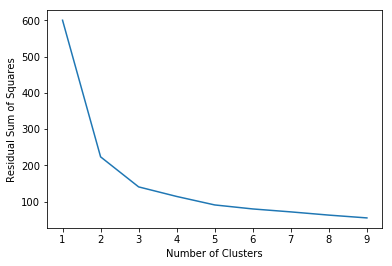

In [12]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

clusts = range(1, 10)

def kmean_rss_score(nclust):
    km = Pipeline([('scale', StandardScaler()), ('cluster', KMeans(nclust))])
    km.fit(X)
    rss = -km.score(X)
    return rss

rss = [kmean_rss_score(i) for i in clusts]
plt.plot(clusts, rss)
plt.xlabel('Number of Clusters')
plt.ylabel('Residual Sum of Squares')


## Silhouette Scores

Silhouette scores are a slightly better measure of cluster 'goodness' since they take into effect the density of each cluster as well as the distance _between_ clusters.

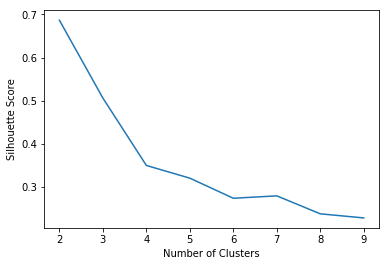

In [13]:
from silhouette import silhouette_plot
from sklearn.metrics import silhouette_samples, silhouette_score

clusts = range(2, 10)

def kmean_silhouette_score(nclust):
    km = Pipeline(steps=[
        ('scale', StandardScaler()),
        ('kmeans', KMeans(nclust))
    ])
    labels = km.fit_predict(X)
    score = silhouette_score(X, labels)
    return score


scores = [kmean_silhouette_score(i) for i in clusts]
plt.plot(clusts, scores)
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')

In [14]:
%%javascript
IPython.OutputArea.auto_scroll_threshold = 9999;

<IPython.core.display.Javascript object>

For n_clusters = 2 The average silhouette_score is : 0.68639305432


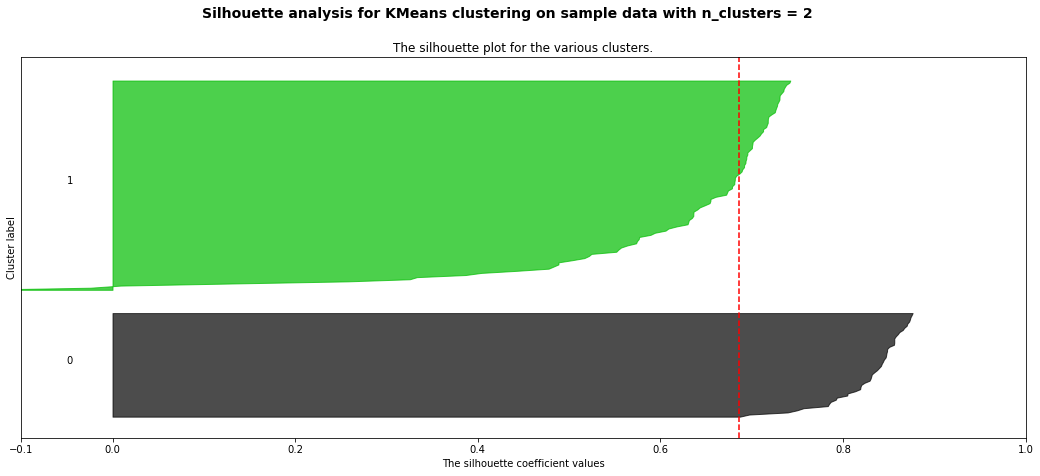

For n_clusters = 3 The average silhouette_score is : 0.505931216022


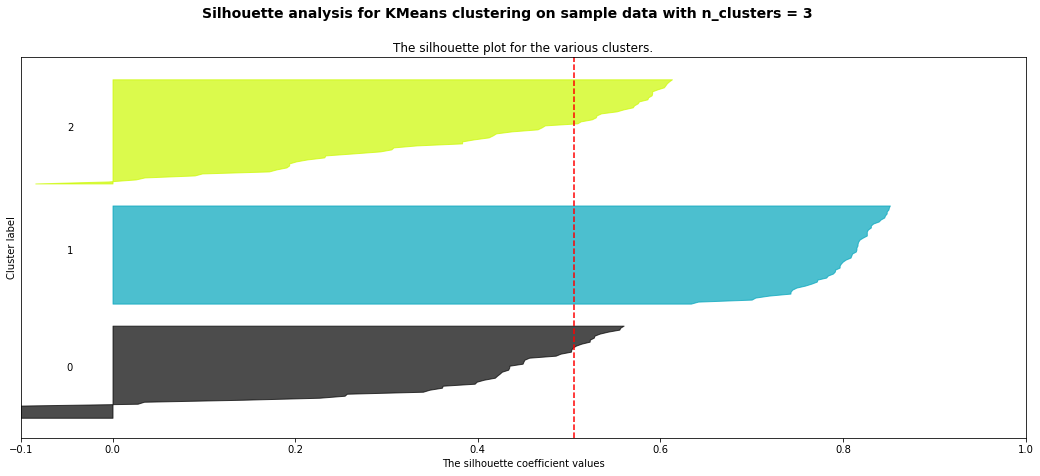

For n_clusters = 4 The average silhouette_score is : 0.356211909175


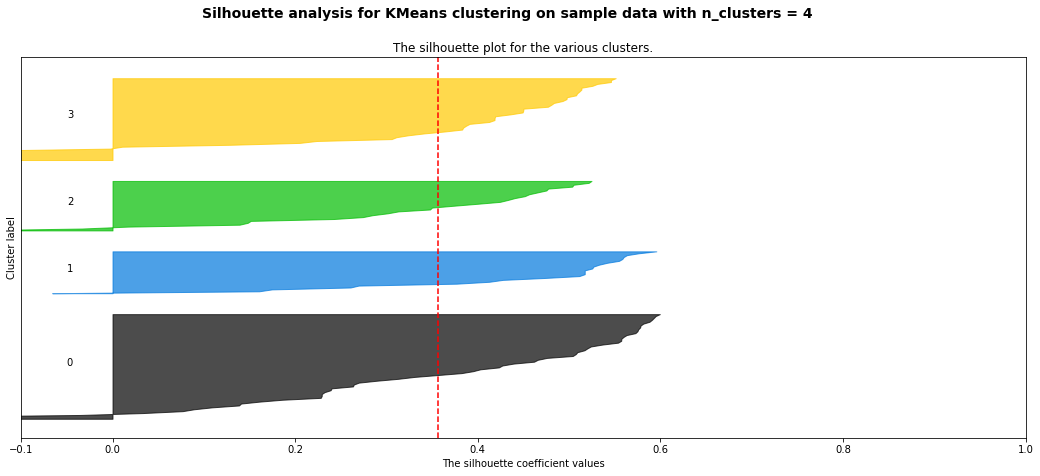

For n_clusters = 5 The average silhouette_score is : 0.320368125127


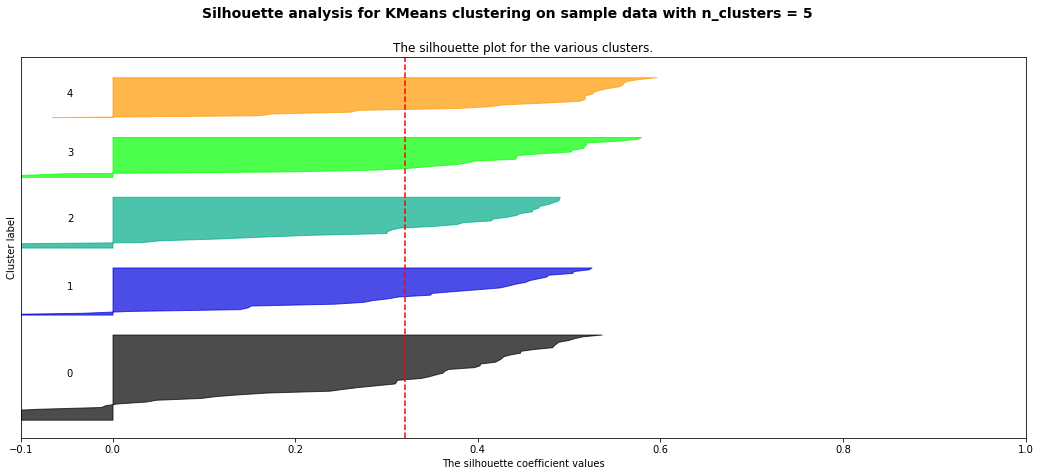

For n_clusters = 6 The average silhouette_score is : 0.261630152207


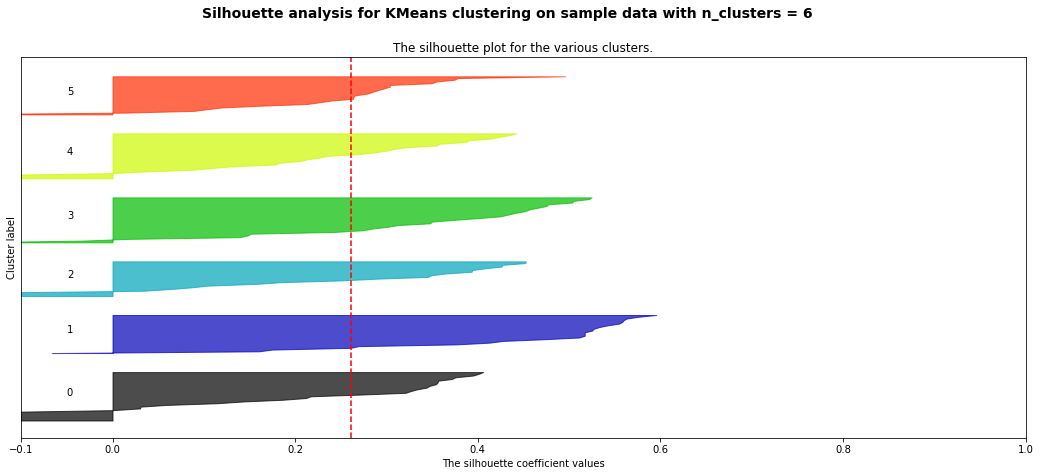

In [15]:
for i in range(2, 7):
    clusterer = Pipeline(steps=[
        ('scale', StandardScaler()),
        ('kmeans', KMeans(i))
    ])
    silhouette_plot(X, y, clusterer, i)

## Hierarchical Clustering

Use scipy for this one

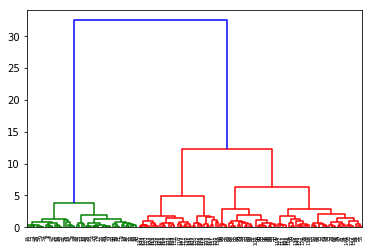

In [16]:
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster

clusters = linkage(X, 'ward')
_ = dendrogram(clusters)

Pick clusters by cutting the dendrogram at a specified height

In [17]:
labels = fcluster(clusters, 5, criterion='distance')

In [18]:
pd.crosstab(y, labels)

col_0,1,2,3,4
row_0,,,,
setosa,50,0,0,0
versicolor,0,1,25,24
virginica,0,35,1,14


## DBSCAN

For DBSCAN, we need to pick `min_samples` and $\epsilon$. One way to do this:

1. Fix a value of `min_samples` that makes sense for this data.
2. Try a wide range of values for $\epsilon$ and record the number of unique labels for each one.
3. Look for a persistent number of clusters over a wide range of $\epsilon$

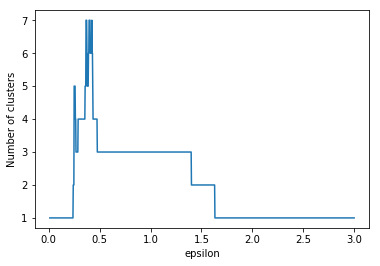

In [19]:
from sklearn.cluster import DBSCAN

epsilons = np.linspace(.01, 3, 1000)

def dbscan_clusters(eps):
    db = Pipeline([('scale', StandardScaler()), ('cluster', DBSCAN(eps=eps, min_samples=5))])
    labels = db.fit_predict(X)
    return len(np.unique(labels))
nclusts = [dbscan_clusters(e) for e in epsilons]
plt.plot(epsilons, nclusts)
plt.xlabel('epsilon')
plt.ylabel('Number of clusters')
plt.show()

Pick a few representative choices for $\epsilon$ and see how the clusters compare to the true labels.

In [20]:
# db = DBSCAN(eps=.6, min_samples=5)
db = Pipeline([('scale', StandardScaler()), ('cluster', DBSCAN(eps=.6, min_samples=5))])
labels = db.fit_predict(X)
pd.crosstab(y, labels)

col_0,-1,0,1
row_0,,,
setosa,4,46,0
versicolor,8,0,42
virginica,14,0,36


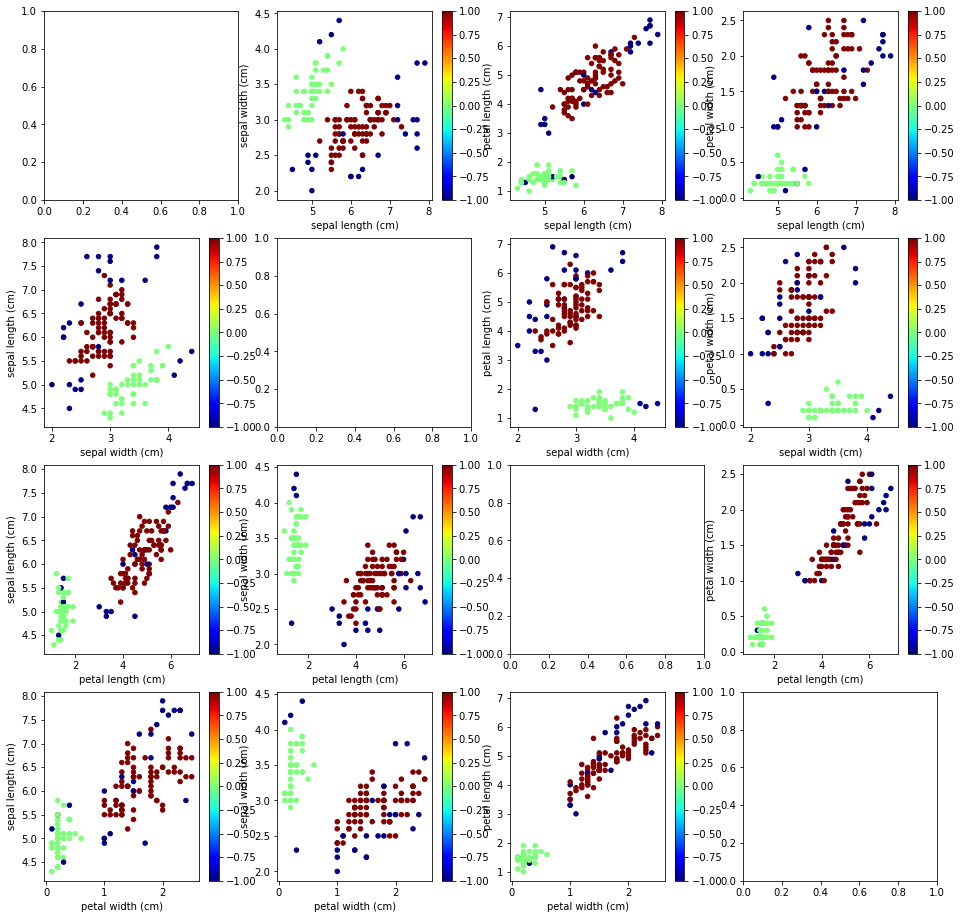

In [21]:
import matplotlib.cm as cm

fig, axes = plt.subplots(nrows=X.shape[1], ncols=X.shape[1], sharex=False, sharey=False, figsize = (16, 16))

cmap = cm.jet
for i, f1 in enumerate(X.columns):
    for j, f2 in enumerate(X.columns):
       if not f1 == f2:
        X.plot(kind='scatter', x=f1, y=f2, c=labels, cmap=cmap, ax=axes[i, j])
        
            
plt.show()